In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_aistat_matplotib_rcparams()

In [4]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])

## Choose and Load Experiment

In [5]:
EXP_DIR = "../output/pre-aistats-rebuttal/dimRegime-gb-setting-2/"
output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR)

print(output_df.shape)
output_df.head()

Process file: ../output/pre-aistats-rebuttal/dimRegime-gb-setting-2/1590953832-g04-d50-n500000/output-03.json...
(200, 24)


,vi_as_po,vi_ar_po,vi_bs_po,vi_br_po,vi_conv,vi_history,vi_adj_mean,vi_adj_mode,gb_baseline,gb_beta,...,expId,outputIdx,dim_o,baseline,beta,adjacency,dim,max_jumps,sim_seed_list,gen_seed
0,"[[317.82869657440693, 1120.6014358959574, 1124...","[[36024.77734375, 36030.7890625, 36017.0898437...","[[23.71859206098263, 159.39365931547977, 281.2...","[[25.5562685266375, 200.79896999518726, 341.49...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[0.009627458339653092, 0.15571151975096156, 0...","[[0.009474778968989565, 0.15551844726662778, 0...","[0.038213935175799, 0.04611805729405588, 0.061...","[2.393371911214989, 2.156890815364304, 1.55315...",...,../output/pre-aistats-rebuttal/dimRegime-gb-se...,output-00.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004
1,"[[631.56554757411, 876.4904451300749, 1316.651...","[[36762.0546875, 36760.40625, 36755.21875, 367...","[[9.964881833264828, 182.85177708002405, 250.2...","[[10.003356095491469, 267.397219753294, 382.16...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.5422159793637187e-05, 0.17788214636285032,...","[[-0.0, 0.1776814587594192, 0.2484511127336875...","[0.035811406724840886, 0.0462823440173538, 0.0...","[2.439177212728035, 2.0923143216625784, 1.6507...",...,../output/pre-aistats-rebuttal/dimRegime-gb-se...,output-01.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004
2,"[[515.1114471149472, 987.3363919010609, 1465.9...","[[36643.8671875, 36650.609375, 36653.6875, 366...","[[9.964715939870715, 146.27150227118074, 225.9...","[[10.006289455341552, 171.4827509689145, 271.6...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.4882537526356529e-05, 0.1445299799736625, ...","[[-0.0, 0.14434105562979455, 0.224453606087008...","[0.03588576902760973, 0.0444154401392726, 0.05...","[2.4763154326802788, 2.075069972857667, 1.6468...",...,../output/pre-aistats-rebuttal/dimRegime-gb-se...,output-02.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004
3,"[[639.9810767858422, 955.0188363218642, 1238.1...","[[36232.0625, 36223.71875, 36215.90625, 36240....","[[9.965126380890037, 172.73806505102354, 290.2...","[[10.006395881187265, 254.39917426406998, 456....",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.517840226196874e-05, 0.1681477139000803, 0...","[[-0.0, 0.16794181232673094, 0.291161807362889...","[0.03519964928522691, 0.04476179221430195, 0.0...","[2.4073829446189796, 2.1600343164485323, 1.645...",...,../output/pre-aistats-rebuttal/dimRegime-gb-se...,output-03.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004
4,"[[2176.744999034283, 1133.5822923541443, 748.0...","[[34906.18359375, 34906.33203125, 34903.015625...","[[1776.5810873844707, 908.4082482586882, 108.0...","[[1912.200498989322, 1365.4981176343722, 111.7...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[0.4104304251105678, 0.20596247605757942, 0.0...","[[0.4103518970032121, 0.205870674100053, 0.019...","[0.1702335554397003, 0.1528981869531242, 0.075...","[0.5776856849645305, 0.6146891834417362, 1.176...",...,../output/pre-aistats-rebuttal/dimRegime-gb-se...,output-00.json,5,"[0.049, 0.0262, 0.0384, 0.0113, 0.0364]","[[0.0813, 0.6992, 0.9994, 0.855, 0.0579], [0.4...","[[0.4291507633587786, 0.24403625954198474, 0.0...",5,50000,"[1932551514, 1387882336, 1179797097, 223088044]",1409237375


---

Process dataframe for plot

In [6]:
suf_col_dict = {
    #'mle': 'mle_adjacency', 
    #'mle_other': 'mle_other_adjacency', 
    
    #'bbvi': 'bbvi_adj_mean', 
    #'bbvi': 'bbvi_adj_mode',
    
    'vi': 'vi_adj_mean',
    #'vi': 'vi_adj_mode',
    
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_vi                                        acc_gb            \
          min       max      mean       std count       min       max   
dim                                                                     
5    1.000000  1.000000  1.000000  0.000000    20  0.800000  0.920000   
10   0.980000  1.000000  0.996000  0.007539    20  0.790000  0.910000   
15   0.977778  1.000000  0.993556  0.005093    20  0.822222  0.897778   
20   0.965000  1.000000  0.990875  0.008401    20  0.857500  0.902500   
25   0.982400  1.000000  0.990800  0.004610    20  0.857600  0.913600   
30   0.970000  0.998889  0.986611  0.006573    20  0.864444  0.911111   
35   0.973878  0.992653  0.984776  0.005822    20  0.874286  0.912653   
40   0.979375  0.994375  0.987781  0.003866    20  0.893125  0.915625   
45   0.971852  0.992099  0.983012  0.006239    20  0.877037  0.916543   
50   0.970000  0.984400  0.979540  0.004160    20  0.884400  0.906000   

                               ... fn_vi                             fn_gb  \
         mean       std count  ...   min max   mean        std count   min   
dim                            ...                                           
5    0.876000  0.040833    20  ...     0   0   0.00   0.000000    20     0   
10   0.852000  0.028580    20  ...     0   2   0.35   0.745160    20     3   
15   0.864667  0.020263    20  ...     0   5   1.25   1.208522    20    13   
20   0.878125  0.012484    20  ...     0  14   3.50   3.300718    20    24   
25   0.882480  0.015333    20  ...     0  11   5.15   2.870448    20    37   
30   0.885222  0.013789    20  ...     1  23  11.10   5.495453    20    47   
35   0.895878  0.011418    20  ...     7  31  17.60   6.969105    20    76   
40   0.903438  0.007145    20  ...     8  31  18.70   5.795643    20    95   
45   0.895877  0.013078    20  ...    14  55  32.60  12.419848    20   122   
50   0.896940  0.006541    20  ...    38  73  49.80  10.303806    20   169   

                                   
     max    mean        std count  
dim                                
5      3    0.70   0.864505    20  
10    10    7.40   1.818038    20  
15    26   19.75   3.354102    20  
20    44   32.35   6.409491    20  
25    63   49.90   7.376349    20  
30    90   73.00  12.636622    20  
35   109   90.80  10.395343    20  
40   127  110.95  10.674490    20  
45   192  153.35  22.342490    20  
50   215  189.65  13.997274    20  

[10 rows x 170 columns]

Check count

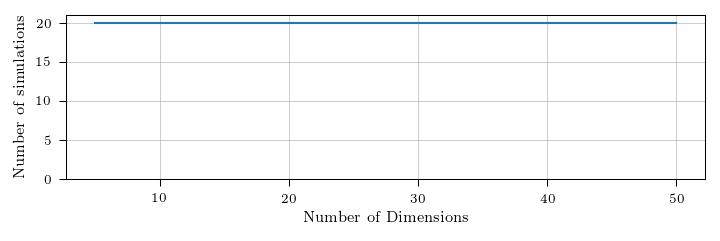

In [7]:
plt.figure(figsize=(5.5, 1.45))
plt.grid()
plt.plot(plot_df.index, plot_df['acc_vi']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions')
plt.ylim(bottom=0);

Plot

In [9]:
tsvar.plotting.set_aistat_matplotib_rcparams()

# List the metrics to plots:
# --------------------------
#   (metric_name, label)
plot_meta_data = [
#     ('f1score',     'F1-Score',         ), 
    ('relerr',      'Relative Error',   ),
#    ('log_relerr',      'Relative Error',   ),
    ('runtime_log', 'Runtime (in min)', ),
#    ('runtime_lin', 'Runtime (in min)', ),
        
#    ('precAt5',     'Precision@5',      ),
    ('precAt10',    'Precision@10',     ),
#    ('precAt20',    'Precision@20',     ),
#    ('precAt50',    'Precision@50',     ),
#    ('precAt100', 'Precision@100',     ),
#    ('precAt200', 'Precision@200',     ),
    
   ('num_iter', 'Number of iterations'), 
    
    ('pr_auc', 'PR-AUC'),
#     ('roc_auc', 'ROC-AUC'),
]

# List the methods to plots:
# --------------------------
#   (prefix, label,  color,  ls,   lw)
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    #('bbvi',  'BBVI', 'C1', '-',  1.0), 
    #('mle',  'MLE',   'C0', '-',  1.0), 
    #('mle_other',  'MLE',   'C0', '-',  1.0), 
]

exp_name = EXP_DIR.rstrip(os.path.sep).split(os.path.sep)[-1]
output_dir = os.path.join('/Users/trouleau/Desktop/', exp_name)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

for i, (prefix, ylabel) in enumerate(plot_meta_data):
    print(prefix)
    
    plt.figure(figsize=(3.25, 1.75))
    
    max_val = -np.inf
    min_val = np.inf
    for suf, label, color, ls, lw in queries_list:
        col = '_'.join([prefix, suf])
        
        y = np.array(plot_df[col]['mean'])
        yerr = np.array(plot_df[col]['std'])
        
        if np.min(y - yerr) < 0:
            args = np.where(y - yerr < 0)[0]
            yerr[args] = y[args] - 1e-2
        
            print(y)
            print(y - yerr)
        
        plt.errorbar(plot_df.index, y, yerr=yerr, 
                     label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                     marker='o', markersize=2*lw)
        max_val = max(max_val, np.max(plot_df[col]['mean'] + plot_df[col]['std']))
        min_val = min(min_val, np.min(plot_df[col]['mean'] - plot_df[col]['std']))
    
    plt.xlabel(f'Number of Dimensions $K$', labelpad=0)
    plt.ylabel(ylabel, labelpad=3);
    
    if prefix == 'f1score':
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.grid()
        #plt.legend(loc='lower left', prop={'size': 7})
        plt.ylim(bottom=0.5)
    
    if prefix == 'relerr':
        plt.gca().tick_params(axis='y', which='major', pad=0.5)
        plt.grid(which='both', axis='both')
        plt.ylabel(ylabel, labelpad=0);
        plt.yscale('log')
        plt.ylim(bottom=0.04)
        plt.legend(loc='upper right', prop={'size': 7})
        pass
    
    if prefix == 'log_relerr':
        #plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
        #    np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        #plt.gca().yaxis.set_major_locator(ticker.FixedLocator([100, 10, 1, 0.1, 0.01])) 
        plt.grid(which='both', axis='both')
        #vals = [-2, -1, 0, 1]
        #labs = ['$10^{'+f'{e:d}'+'}$' for e in vals]
        #plt.yticks(vals, labs)
        plt.ylim(bottom=min_val*1.2, top=max_val*2.0)
        pass
        
    if prefix == 'runtime_log':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        plt.gca().yaxis.set_major_locator(ticker.FixedLocator([100, 10, 1, 0.1, 0.01])) 
        plt.grid(which='both', axis='both')
        vals = [-1, 0, 1, 2]
        labs = ['$10^{'+f'{e:d}'+'}$' for e in vals]
        plt.yticks(vals, labs)
        pass

    if prefix.startswith('prec'):
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.grid()
        plt.ylim(bottom=0)

    if prefix.startswith('num_iter'):
        plt.grid()
        plt.yscale('log', basey=10, nonposy='clip');
        
    if (prefix == 'pr_auc') or (prefix == 'roc_auc'):
        #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.grid()
        plt.ylim(top=1.04) 
        plt.ylim(bottom=0.0, top=1.04) 
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.15, right=0.99, top=0.94, bottom=0.15)
    plt.savefig(os.path.join(output_dir, f'fig-{exp_name}-{prefix}.pdf'))
    plt.close()

relerr
runtime_log
[-0.68044575 -0.11251478  0.24315417  0.55631888  0.82901308  1.00909974
  1.12348431  1.15155138  1.18436035  1.13269345]
[0.01       0.01       0.14998984 0.43379874 0.73334962 0.93857849
 1.07234164 1.11304645 1.10582673 1.01990705]
[-0.30618531  0.00474808  0.2295919   0.38907078  0.48841453  0.57788768
  0.64299418  0.74895179  0.72032983  0.74752312]
[0.01       0.01       0.18299145 0.31917747 0.41866675 0.51503553
 0.60163286 0.68633248 0.68226951 0.67027645]
precAt10
num_iter
pr_auc


---

### Varying threshold

In [65]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    'mle_other': 'mle_other_adjacency', 
    'bbvi': 'bbvi_adj_mean', 
    'vi': 'vi_adj_mean',
    'gb': 'gb_adj_normed',
}


data_thresh_list = list()
thresh_range = np.linspace(0.0, 0.1, 11)
for thresh in thresh_range:
    print(thresh)
    this_plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col=None, threshold=thresh)
    this_plot_df['threshold'] = thresh
    data_thresh_list.append(this_plot_df.copy())
    
all_df_thresh = pd.concat(data_thresh_list)

# Keep only dim=10
all_df_thresh = all_df_thresh.loc[all_df_thresh['dim'] == 10]
    
plot_df_thresh = all_df_thresh.groupby('threshold').agg(['mean', 'std'])

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1


In [66]:
plot_df_thresh

dim_o      dim_x      max_jumps           gen_seed                \
           mean  std  mean  std      mean  std          mean           std   
threshold                                                                    
0.00       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.01       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.02       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.03       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.04       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.05       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.06       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.07       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.08       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.09       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   
0.10       10.0  0.0  10.0  0.0  100000.0  0.0  1.189616e+09  6.365763e+08   

          mle_num_iter               ... num_iter_mle               \
                  mean          std  ...         mean          std   
threshold                            ...                             
0.00            9305.0  8990.607672  ...       9305.0  8990.607672   
0.01            9305.0  8990.607672  ...       9305.0  8990.607672   
0.02            9305.0  8990.607672  ...       9305.0  8990.607672   
0.03            9305.0  8990.607672  ...       9305.0  8990.607672   
0.04            9305.0  8990.607672  ...       9305.0  8990.607672   
0.05            9305.0  8990.607672  ...       9305.0  8990.607672   
0.06            9305.0  8990.607672  ...       9305.0  8990.607672   
0.07            9305.0  8990.607672  ...       9305.0  8990.607672   
0.08            9305.0  8990.607672  ...       9305.0  8990.607672   
0.09            9305.0  8990.607672  ...       9305.0  8990.607672   
0.10            9305.0  8990.607672  ...       9305.0  8990.607672   

          num_iter_mle_other             num_iter_bbvi      num_iter_vi  \
                        mean         std          mean  std        mean   
threshold                                                                 
0.00                 19115.0  3957.84032       20000.0  0.0       303.5   
0.01                 19115.0  3957.84032       20000.0  0.0       303.5   
0.02                 19115.0  3957.84032       20000.0  0.0       303.5   
0.03                 19115.0  3957.84032       20000.0  0.0       303.5   
0.04                 19115.0  3957.84032       20000.0  0.0       303.5   
0.05                 19115.0  3957.84032       20000.0  0.0       303.5   
0.06                 19115.0  3957.84032       20000.0  0.0       303.5   
0.07                 19115.0  3957.84032       20000.0  0.0       303.5   
0.08                 19115.0  3957.84032       20000.0  0.0       303.5   
0.09                 19115.0  3957.84032       20000.0  0.0       303.5   
0.10                 19115.0  3957.84032       20000.0  0.0       303.5   

                     num_iter_gb       
                 std        mean  std  
threshold                              
0.00       14.244112      3000.0  0.0  
0.01       14.244112      3000.0  0.0  
0.02       14.244112      3000.0  0.0  
0.03       14.244112      3000.0  0.0  
0.04       14.244112      3000.0  0.0  
0.05       14.244112      3000.0  0.0  
0.06       14.244112      3000.0  0.0  
0.07       14.244112      3000.0  0.0  
0.08       14.244112      3000.0  0.0  
0.09       14.244112      3000.0  0.0  
0.10       14.244112      3000.0  0.0  

[11 rows x 156 columns]

In [67]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle_other',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'f1score'


plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Threshold $\eta$', labelpad=0)
plt.ylabel('F1-Score', labelpad=3);
    
for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])

    plt.errorbar(plot_df_thresh[col].index, plot_df_thresh[col]['mean'], yerr=plot_df_thresh[col]['std'], 
                 label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                 marker='o', markersize=2*lw)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend(loc='lower right', prop={'size': 7})
plt.ylim(bottom=0)

plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-threshold.pdf')
plt.close()

---

### Numer of iterations

In [58]:
for suf in ['vi', 'gb', 'bbvi', 'mle']:
    output_df[f'num_iter_log_{suf}'] = output_df[f'num_iter_{suf}'].apply(np.log10)

In [63]:
num_iter_cols = [f'num_iter_log_{suf}' for suf in ['vi', 'gb', 'bbvi', 'mle']] 
num_iter_plot_df = output_df[num_iter_cols + ['dim']].groupby('dim').agg(['mean', 'std'])

In [94]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'num_iter_log'

plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Number of dimensions $M$', labelpad=0)
plt.ylabel('Number of iterations \n performed', labelpad=3);
    

for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])
    
    plt.errorbar(num_iter_plot_df[col].index, num_iter_plot_df[col]['mean'], yerr=num_iter_plot_df[col]['std'], 
             label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
             marker='o', markersize=2*lw)
    
    plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
        np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [10000, 1000, 100]]))))
    plt.grid(which='both', axis='y')

    plt.yticks([2, 3, 4], ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])

    
#plt.legend(loc='upper left', prop={'size': 7})
#plt.ylim(bottom=10);

plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.99, top=0.97, bottom=0.2)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-num-iter.pdf')
plt.close()